In [206]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
import os
import json 
import glob
import seaborn as sns

category = {'Async Music':"Music", 'Boonji Project':"Image", 'Bored Ape Yacht Club':"Image",
            'VeeFriends':"Image", 'CryptoPunks':"Image", 'Doodles':"Image", 'EulerBeats Enigma':"Music",
            'EulerBeats Genesis':"Music", 'Cryptoblots by Dam Aggott-Hnsch':"Image",
            'JingleBe NFT COLLECTION':"Music", 'LOSTPOETS':"Image", 'NAMEWEE4896 Collection':"Music",
            'Nifty Sax Spheres':"Music", 'Rarible':"*Marketplace (Rarible/Superrare)", 'Song A Day':"Video", '"I\'m Spottie"':"Music",
            'SuperRare':"*Marketplace (Rarible/Superrare)", 'THE SHIBOSHIS':"Image"}


df = pd.DataFrame()

for json_files in glob.glob('data\preprocessed\json\*.json'):
    if not df.empty:
        temp = pd.read_json(json_files)
        if len(temp) == 2:
            temp.at[0,'media_filenames'] = [temp.iloc[0].media_filenames,temp.iloc[1].media_filenames]
        df = df.append(temp.head(1))
    else:
        temp = pd.read_json(json_files)
        if len(temp) == 2:
            temp.at[0,'media_filenames'] = [temp.iloc[0].media_filenames,temp.iloc[1].media_filenames]
        df = pd.DataFrame(temp.head(1))
df.fillna('',inplace=True)
df = df.astype({"name": str, "description": str, "collection_name": str, "collection_description":str})
df['Category'] = df['collection_name'].apply(lambda x: category.get(x))


In [207]:
df

,name,description,collection_name,collection_description,eth_price,eth_price_decimal,usd_price,usd_volume,usd_marketcap,transaction_time,media_filenames,has_audio_in_video,Category
0,The Song of Nine Paths Silver Edition (Mix: 23...,"I saw a whisper, No matter how I go! Breathles...",Async Music,Create and collect #ProgrammableArt and #Progr...,3.000000e+17,18,3227,1.32966e+10,3.78559e+11,2021-08-29 11:59:48,"[data/preprocessed/media/tmp/0.jpg, data/prepr...",False,Music
0,The Song of Nine Paths Silver Edition (Mix: 30...,"I saw a whisper, No matter how I go! Breathles...",Async Music,Create and collect #ProgrammableArt and #Progr...,9.000000e+16,18,2124.78,1.62004e+10,2.48204e+11,2021-07-23 10:16:28,"[data/preprocessed/media/tmp/1.jpg, data/prepr...",False,Music
0,The Song of Nine Paths Silver Edition (Mix: 01...,"I saw a whisper, No matter how I go! Breathles...",Async Music,Create and collect #ProgrammableArt and #Progr...,2.500000e+17,18,2853.14,1.57635e+10,3.35894e+11,2021-09-29 22:00:33,"[data/preprocessed/media/tmp/10.jpg, data/prep...",False,Music
0,BOONJI #1159,"Boonji Project is a collection of 11,111 uniqu...",Boonji Project,"Boonji Project, launched on the Ethereum block...",4.000000e+17,18,3970.18,1.94329e+10,4.68624e+11,2021-10-22 01:52:33,data/preprocessed/media/tmp/100.jpg,False,Image
0,#694,,Bored Ape Yacht Club,The Bored Ape Yacht Club is a collection of 10...,1.300000e+18,18,2643.59,5.36971e+10,3.06684e+11,2021-05-24 13:51:46,data/preprocessed/media/tmp/1000.jpg,False,Image
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Gracious Grasshopper,This token is verifiable for admission to VeeC...,VeeFriends,A Gary Vaynerchuk NFT project around meaningfu...,7.500000e+18,18,2724.62,2.50387e+10,3.18706e+11,2021-08-04 19:40:40,data/preprocessed/media/tmp/9995.jpg,False,Image
0,Gracious Grasshopper,This token is verifiable for admission to VeeC...,VeeFriends,A Gary Vaynerchuk NFT project around meaningfu...,4.400000e+18,18,2025.2,1.74955e+10,2.36545e+11,2021-07-22 14:59:20,data/preprocessed/media/tmp/9996.jpg,False,Image
0,Gracious Grasshopper,This token is verifiable for admission to VeeC...,VeeFriends,A Gary Vaynerchuk NFT project around meaningfu...,2.900000e+18,18,2517.44,4.19097e+10,2.92557e+11,2021-06-08 15:12:23,data/preprocessed/media/tmp/9997.jpg,False,Image
0,Gracious Grasshopper,This token is verifiable for admission to VeeC...,VeeFriends,A Gary Vaynerchuk NFT project around meaningfu...,7.845906e+18,18,3310.5,2.21662e+10,3.87728e+11,2021-08-15 21:20:51,data/preprocessed/media/tmp/9998.jpg,False,Image


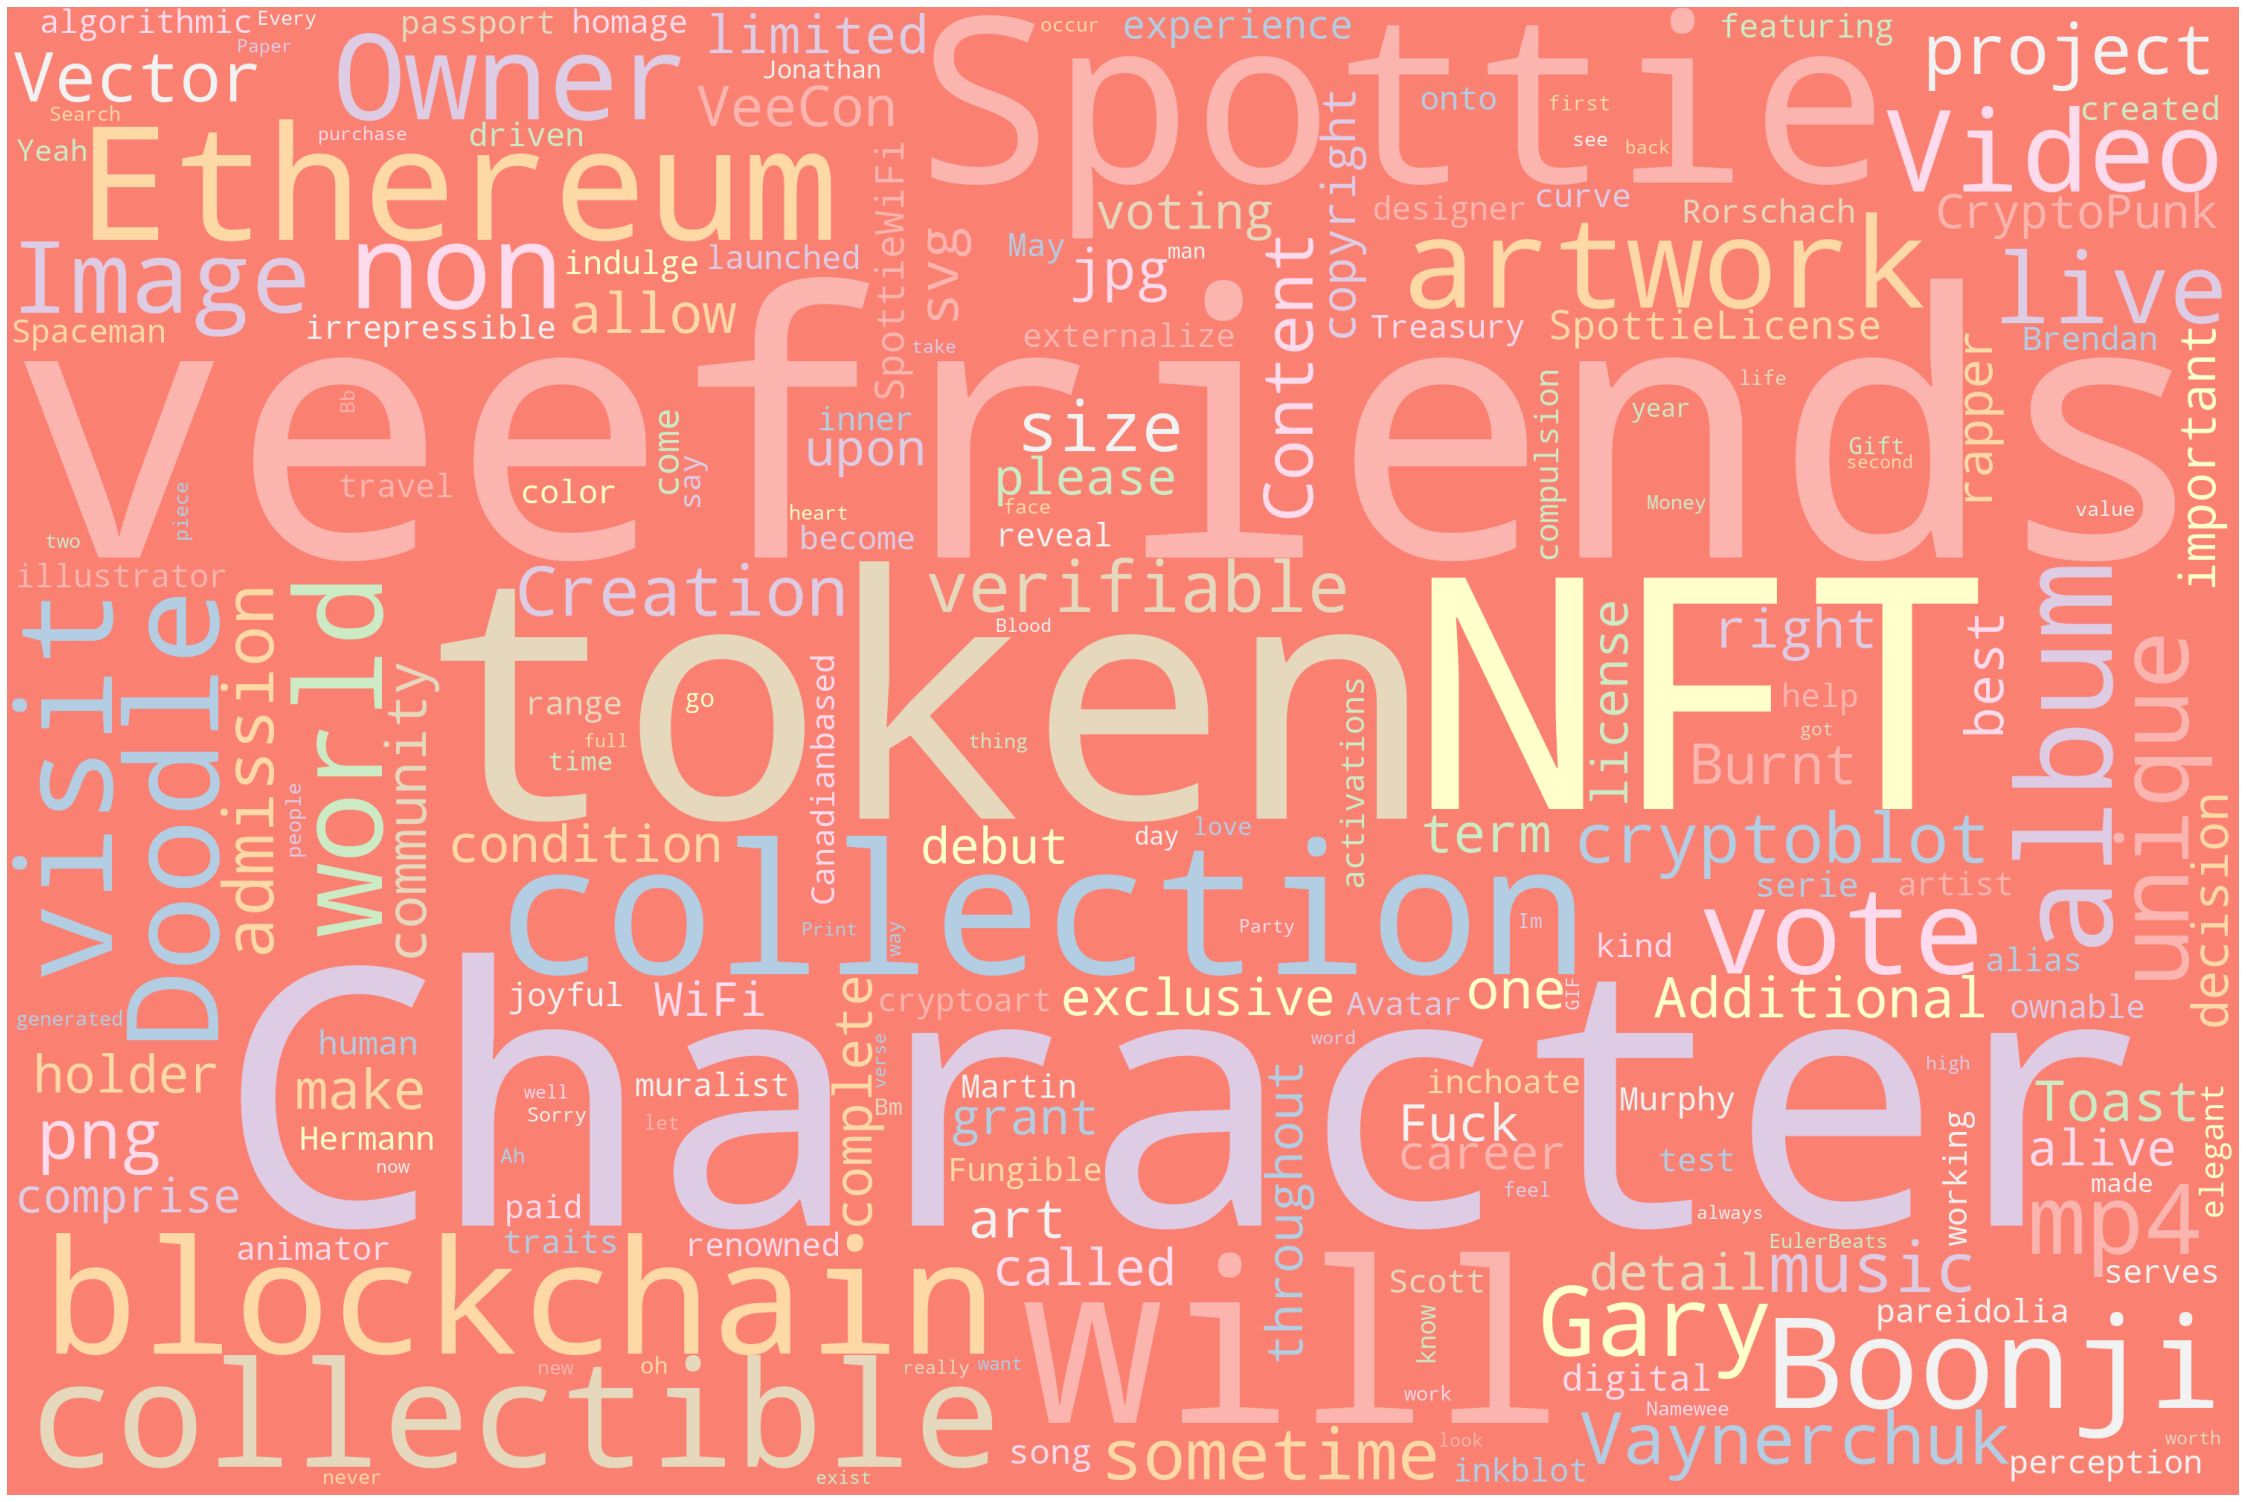

In [59]:
# Import package
import matplotlib.pyplot as plt
from os import path
from PIL import Image
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
# ' '.join(df.description).replace("https","").replace("f6pXbdBrDkgJjmSV","").replace("QXp2H6Yu0fLSCB0","").replace("XTrDCsS97","").replace("cdn","")
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(' '.join(df.description).replace("https","").replace("f6pXbdBrDkgJjmSV","").replace("QXp2H6Yu0fLSCB0","").replace("XTrDCsS97","").replace("cdn","")).to_file("description_wordcloud.pdf")
# Plot
plot_cloud(wordcloud)

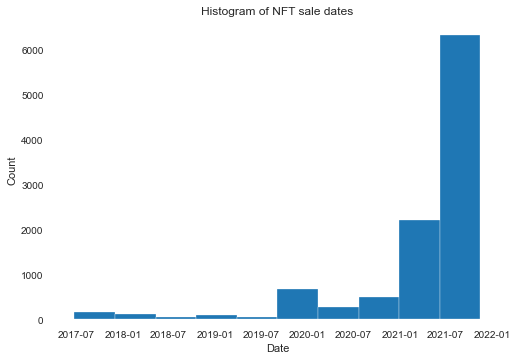

In [60]:
plt.hist(pd.to_datetime(df.transaction_time))
plt.title("Histogram of NFT sale dates")
plt.xlabel("Date")
plt.ylabel("Count")
plt.savefig('visualisations/Histogram_of_sale_dates.pdf')  

# Format Visualisation

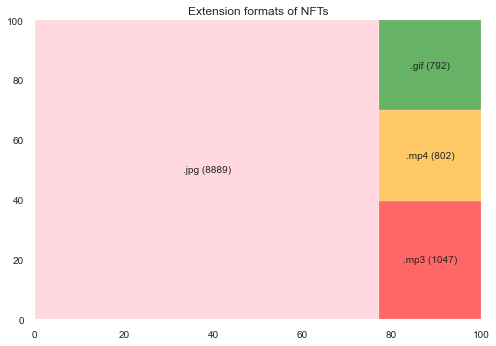

In [131]:
from collections import Counter
import squarify

contents = []

for key,values in df.media_filenames.iteritems():

    if len(values) == 2: 
        for i in values:
            contents.append(i[-4:])
    else: 
        contents.append(values[-4:])

counter = Counter(contents)
squarify.plot(label=[f"{k} ({v})" for k, v in counter.items()],sizes=counter.values(), alpha=0.6,color=("pink", "red", "orange", "green"))
plt.title("Extension formats of NFTs")
plt.savefig('visualisations/Extension_formats_of_NFTs.pdf')  
plt.show()
# fig = plt.figure(
#     FigureClass=Waffle, 
#     rows=1000, 
#     values=counter, 
#     colors=("#983D3D", "#232066", "#DCB732", "green"),
#     title={'label': 'Extension formats of NFTs', 'loc': 'left'},
#     labels=[f"{k} ({v})" for k, v in counter.items()],
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(counter), 'framealpha': 0},
#     starting_location='NW',
#     block_arranging_style='snake'
# )
# fig.gca().set_facecolor('#EEEEEE')
# fig.set_facecolor('#EEEEEE')
# plt.show()
# plt.barh(list(counter.keys()),counter.values())
# plt.xlabel("Count")
# plt.ylabel("Extension")
# print(counter)

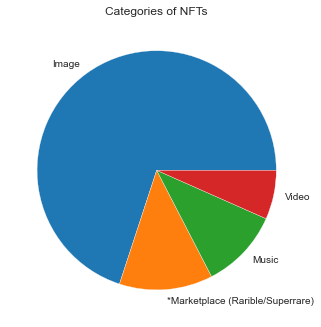

In [164]:
plt.pie(labels=df.Category.value_counts().keys(),x=df.Category.value_counts().values)
plt.title("Categories of NFTs")
plt.savefig('visualisations/Categories_of_NFTs.pdf')  


# Collection Visualisation

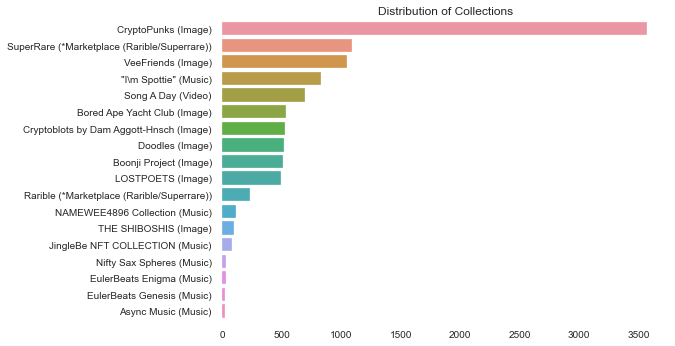

In [241]:
sns.barplot(y=[str(x).replace("(",'').replace("'",'').replace(", "," (").replace("place ","place (") for x in pd.DataFrame(zip(df.collection_name,df.Category)).value_counts().keys()],x=pd.DataFrame(zip(df.collection_name,df.Category)).value_counts().values,orient='h',hue_order=df.collection_name)
plt.title("Distribution of Collections")
plt.savefig('visualisations/Distribution of Collections.pdf',bbox_inches='tight')

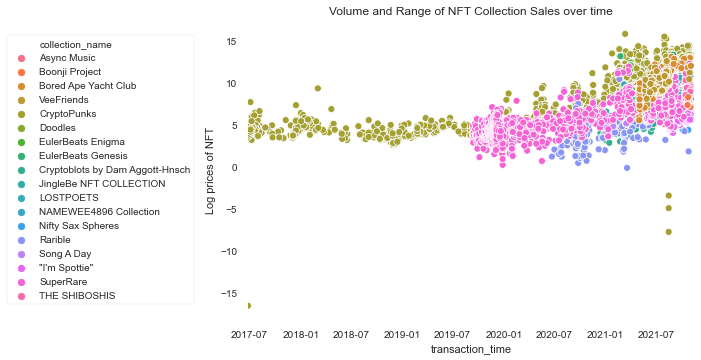

In [243]:
sns.scatterplot(df.transaction_time,np.log((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1))))),hue=(df.collection_name)).set(xlim=(df.transaction_time.min(),df.transaction_time.max()))
plt.title("Volume and Range of NFT Collection Sales over time")
plt.ylabel("Log prices of NFT")
plt.legend(loc='center left', bbox_to_anchor=(-0.55, 0.5), ncol=1)
plt.savefig('visualisations/Volume and Range of NFT Collection Sales over time.pdf',bbox_inches='tight')  

# Price Visualisation

Text(0.5, 0, 'Price of NFT')

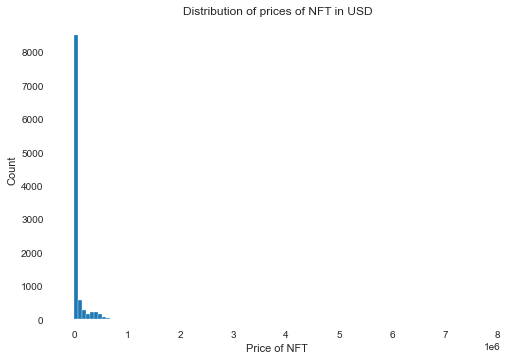

In [220]:
plt.hist((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1)))),bins='sqrt')
plt.title("Distribution of prices of NFT in USD")
plt.ylabel("Count")
plt.xlabel("Price of NFT")

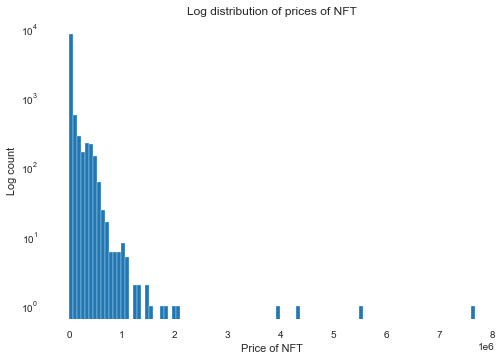

In [245]:
plt.hist((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1)))),log=True,bins='sqrt')
plt.title("Log distribution of prices of NFT")
plt.ylabel("Log count")
plt.xlabel("Actual Price of NFT")
plt.savefig('visualisations/Log_distribution_of_prices_of_NFT.pdf')  

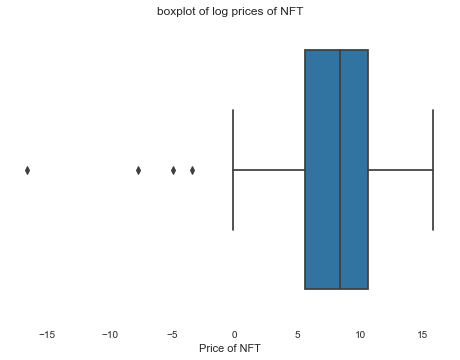

In [143]:
sns.boxplot(np.log(df.eth_price*pd.to_numeric(df.usd_price)*10**(-18)))
plt.title("boxplot of log prices of NFT")
plt.xlabel("Price of NFT")
plt.savefig('visualisations/boxplot_of_log_prices_of_NFT.pdf')  

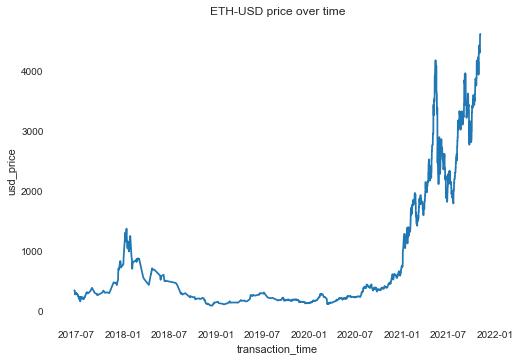

In [144]:
sns.lineplot(df.transaction_time,pd.to_numeric(df.usd_price))
plt.title("ETH-USD price over time")
plt.savefig('visualisations/ETH-USD_price_over_time.pdf')  

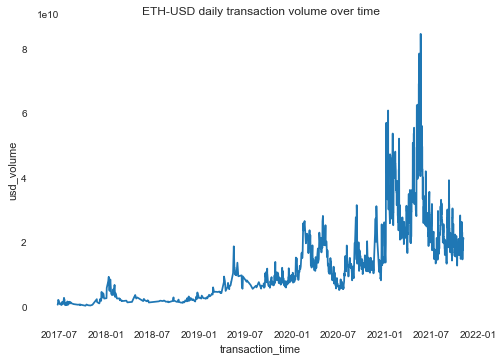

In [145]:
sns.lineplot(df.transaction_time,pd.to_numeric(df.usd_volume))
plt.title("ETH-USD daily transaction volume over time")
plt.savefig('visualisations/ETH-USD_daily_transaction_volume_over_time.pdf')  

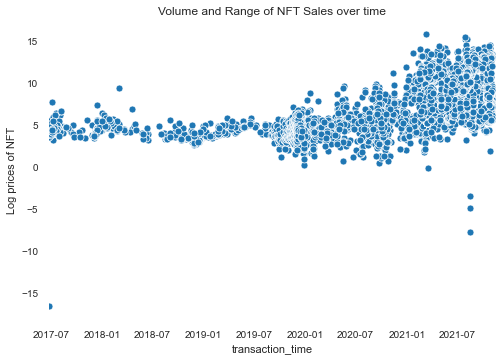

In [147]:
sns.scatterplot(df.transaction_time,np.log((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1)))))).set(xlim=(df.transaction_time.min(),df.transaction_time.max()))
plt.title("Volume and Range of NFT Sales over time")
plt.ylabel("Log prices of NFT")
plt.savefig('visualisations/Volume_and_Range_of_NFT_Sales_over_time.pdf')  

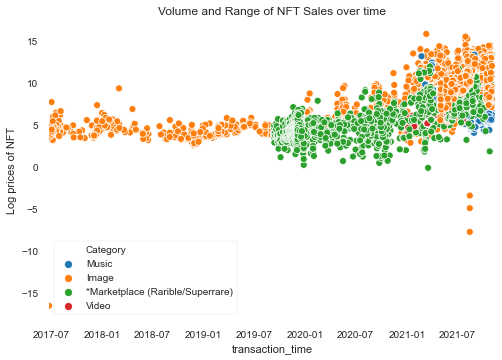

In [148]:
sns.scatterplot(df.transaction_time,np.log((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1))))),hue=(df.Category)).set(xlim=(df.transaction_time.min(),df.transaction_time.max()))
plt.title("Volume and Range of NFT Sales over time")
plt.ylabel("Log prices of NFT")
plt.savefig('visualisations/Coloured_Volume_and_Range_of_NFT_Sales_over_time.pdf')  

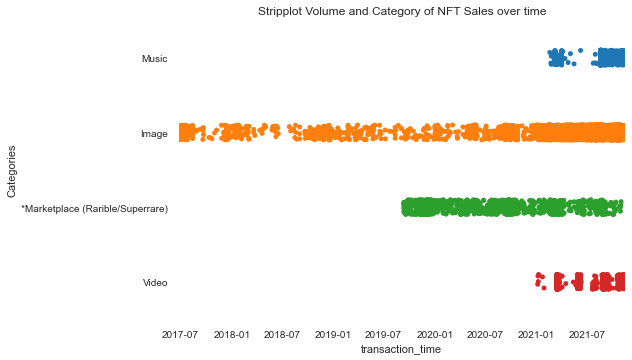

In [149]:
sns.stripplot(y=df.Category,x=df.transaction_time).set(xlim=(df.transaction_time.min(),df.transaction_time.max()))
plt.title("Stripplot Volume and Category of NFT Sales over time")
plt.ylabel("Categories")
plt.savefig('visualisations/Stripplot_Volume_and_Category_of_NFT_Sales_over_time.pdf')  

# Image and Video Data Visualisation

In [150]:
from PIL import Image
from collections import Counter
import cv2

image_resolution = Counter()
video_resolution = Counter()
video_fps = Counter()
video_duration = Counter()


Image.MAX_IMAGE_PIXELS = 1000000000 

def media_data_extractor(string, image_resolution, video_resolution, video_fps, video_duration):
    """ Finds the relevant media data

    Image: Resolution
    Video: Resolution, FPS and duration

    """
    file_path = string.replace('tmp/','')
    if file_path.endswith("jpg"):
        img = Image.open(file_path)
        wid, hgt = img.size
        image_resolution.update({f"({wid},{hgt})":1})
    if file_path.endswith('mp4'):
        cap=cv2.VideoCapture(file_path)
        try:
            fps = round(cap.get(cv2.CAP_PROP_FPS))
            video_fps.update({f"({fps})":1})
        except:
            print(f"{file_path} unable to find fps")
        try:
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            video_resolution.update({f"({width},{height})":1})
        except:
            print(f"{file_path} unable to find resolution: {width},{height}")
        try:
            # rounded minute duration of each video
            duration = round(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))/float(cap.get(cv2.CAP_PROP_FPS))/60)
            video_duration.update({f"({duration})":1})
        except:
            print(f"{file_path} unable to find duration")
    return image_resolution, video_resolution, video_fps, video_duration
    

for value in df.media_filenames:
    if len(value) == 2:
        for string in value:
            image_resolution, video_resolution, video_fps, video_duration = media_data_extractor(string,image_resolution, video_resolution, video_fps, video_duration)
    else:
        image_resolution, video_resolution, video_fps, video_duration = media_data_extractor(value,image_resolution, video_resolution, video_fps, video_duration)


In [151]:
def counter_to_graph(plotter,counter,column_name,title_name,min_count=20):

    image_resolution_df = pd.DataFrame(list(counter.items()))
    image_resolution_df.columns = [column_name,'Count']

    image_resolution_df = image_resolution_df.sort_values(['Count']).reset_index(drop=True)
    image_resolution_df = image_resolution_df.where(image_resolution_df['Count'] >= min_count).dropna()

    if plotter == sns.barplot:
        plotter(image_resolution_df["Count"],image_resolution_df[column_name],orient='h')
    else:
        plotter(x=image_resolution_df["Count"],labels=image_resolution_df[column_name])
    plt.title(title_name)

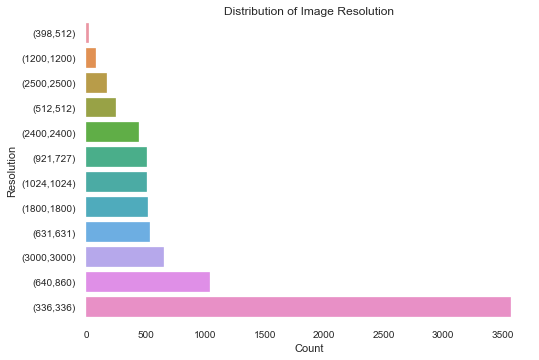

In [156]:
counter_to_graph(sns.barplot,image_resolution,column_name='Resolution',title_name='Distribution of Image Resolution',min_count=20)
plt.savefig('visualisations/Distribution_of_Image_Resolution.pdf')  

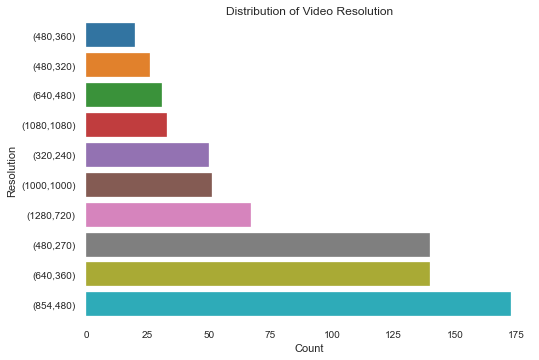

In [157]:
counter_to_graph(sns.barplot,video_resolution,column_name='Resolution',title_name='Distribution of Video Resolution',min_count=20)
plt.savefig('visualisations/Distribution_of_Video_Resolution.pdf') 

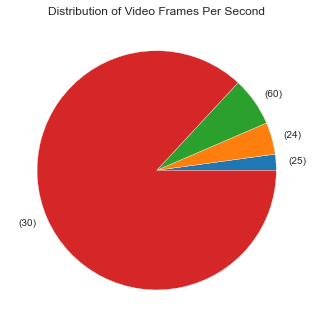

In [158]:
counter_to_graph(plt.pie,video_fps,column_name='Resolution',title_name='Distribution of Video Frames Per Second',min_count=3)
plt.savefig('visualisations/Distribution_of_Video_Frames_Per_Second.pdf') 

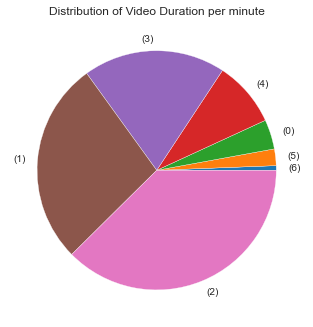

In [159]:
counter_to_graph(plt.pie,video_duration,column_name='Duration',title_name='Distribution of Video Duration per minute',min_count=2)
plt.savefig('visualisations/Distribution_of_Video_Duration_per_minute.pdf') 

# Model Evaluation

In [124]:
# with open("src/model_evaluation/predicted_label.py","r") as f:
#     print(f.read()) 
import pandas as pd 
test_df = pd.read_csv("src/model_evaluation/predicted_label.py",index_col=None)
test_df.columns = test_df.columns.str.replace("'","")
test_df.columns = test_df.columns.str.replace("ids","")
test_df.columns = test_df.columns.str.replace("=","")
test_df.columns = test_df.columns.str.replace("[","")
test_df.columns = test_df.columns.str.replace("]","")
test_df.columns = test_df.columns.str.strip()
test_df.columns = test_df.columns.str.lstrip('0') # Remove zeros

test_df[test_df.columns[0]] = test_df[test_df.columns[0]].str.replace("labels","")
test_df[test_df.columns[0]] = test_df[test_df.columns[0]].str.replace("preds","")
test_df[test_df.columns[0]] = test_df[test_df.columns[0]].str.replace("=","")
test_df[test_df.columns[0]] = test_df[test_df.columns[0]].str.replace("[","")
test_df[test_df.columns[0]] = test_df[test_df.columns[0]].str.replace("]","")
test_df[test_df.columns[0]] = test_df[test_df.columns[0]].str.strip()
test_df[test_df.columns[-1]] = test_df[test_df.columns[-1]].str.replace("]","")
test_df[test_df.columns[0]] = pd.to_numeric(test_df[test_df.columns[0]])
test_df[test_df.columns[-1]] = pd.to_numeric(test_df[test_df.columns[-1]])
test_df = test_df.transpose()
test_df.columns = ['labels','preds']


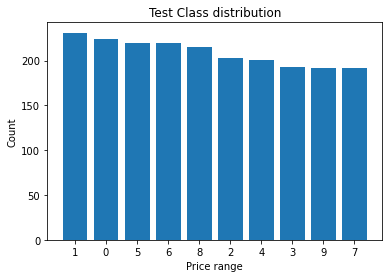

In [198]:
from matplotlib import pyplot as plt


plt.bar([str(x) for x in test_df.labels.value_counts().keys()],test_df.labels.value_counts().values)
plt.ylabel('Count')
plt.xlabel('Price range')
plt.title('Test Class distribution')
plt.savefig('visualisations/Test Class distribution.pdf') 

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,roc_curve, roc_auc_score
import seaborn as sns
import numpy as np
import itertools

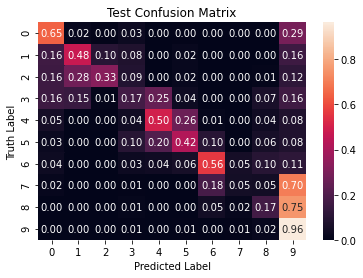

In [199]:
cm = confusion_matrix(test_df.labels.to_numpy(),test_df.preds.to_numpy(),normalize='true')
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Truth Label')
plt.xlabel('Predicted Label')
plt.title('Test Confusion Matrix')
plt.savefig('visualisations/Test Confusion Matrix.pdf') 

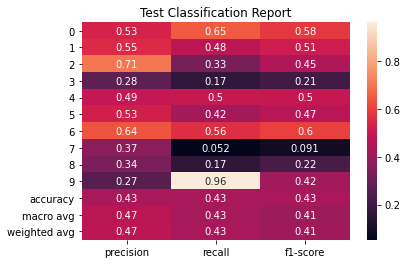

In [200]:
cr = classification_report(test_df.labels.to_numpy(),test_df.preds.to_numpy(), output_dict=True)
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)
plt.title('Test Classification Report')
plt.savefig('visualisations/Test Classification Report.pdf') 

In [208]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc
from scipy import interp



def plot_roc_curve_multiclass(y_true, y_pred, n_classes,class_names=None):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    print("AUC Score: ")
    print(roc_auc_score(np.array(pd.get_dummies(y_true)), np.array(pd.get_dummies(y_pred)), "macro",multi_class = 'ovr'))
    
    t1=sum(x==0 for x in y_pred-y_true)/len(y_pred)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_true))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr['macro'] = all_fpr
    tpr['macro'] = mean_tpr
    roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

    lw=2
    plt.figure(figsize=(8,5))
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='green', linestyle=':', linewidth=4)

    
    colors = itertools.cycle(['aqua', 'darkorange', 'red','lime','gold','blue','purple','crimson','green'])
    for i, color in zip(range(n_classes), colors):
        if class_names:
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(class_names[i], roc_auc[i]))
        else:
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.annotate('Random Guess',(.5,.48),color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()